# <b>CS156 (Introduction to AI), Fall 2022</b>
# <u><b>Homework 6 submission</b></u>

### Roster Name: Rohan Athalye
### Student ID: 014099982
### Email address: rohan.athalye@sjsu.edu

##  <u>References and sources </u>

Perceptron.Breast.ipynb from Canvas under Files/Example Jupyter Notebooks

##  <u>Solution</u>

#### Load libraries and set random number generator seed

In [33]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.metrics import plot_confusion_matrix

In [34]:
np.random.seed(42)

#### Code the solution

#### Load the dataset

In [35]:
digits = datasets.load_digits()
X = digits.data
Y = digits.target
feature_names = digits.feature_names

#### Normalize the dataset

In [36]:
X = X.astype('float32') / 255

#### Convert the dataset to a dataframe

In [37]:
digits_df = pd.DataFrame(X, columns=feature_names)
digits_df['label'] = Y

#### Construct a new output vector for each digit class where the value is 1 for observations of that digit class and 0 otherwise

In [38]:
digits_df = pd.get_dummies(digits_df, columns=['label'], prefix=['label'])

#### Plot non-normalized confusion matrices (1 for each digit) for the test set prediction results

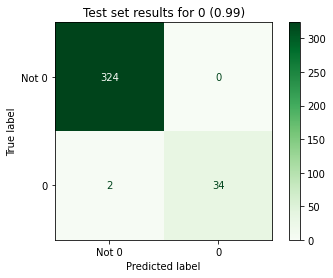

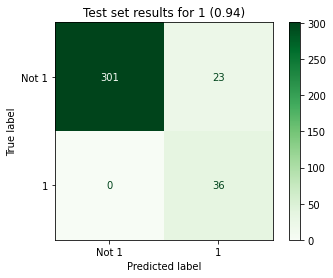

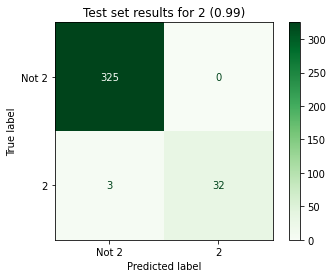

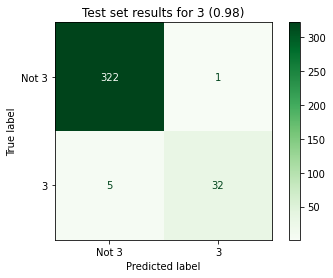

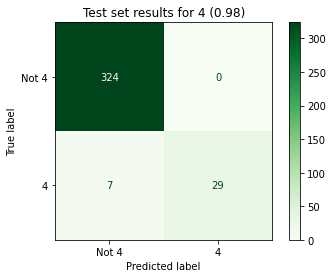

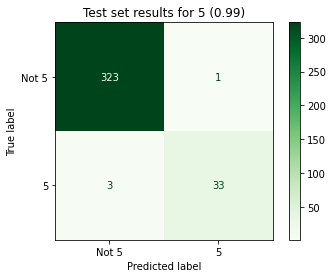

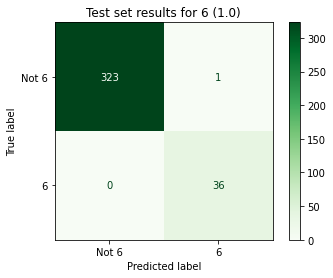

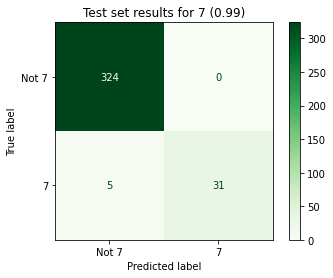

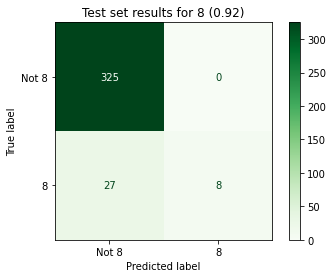

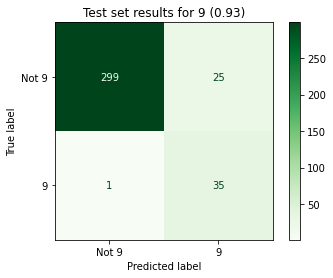

In [39]:
class_labels = digits_df.columns[-10:].to_list() # Gets all the digit classes.
i = 0

# Performed for each digit class (0-9).
for class_label in class_labels:
  # Splits the data into training and test sets, trains a single layer perceptron model on the training data, and computes the accuracy of the model on the test data.
  X_train, X_test, Y_train, Y_test = train_test_split(X, digits_df[class_label], test_size=0.2, random_state=0, stratify=digits_df[class_label])
  model = Perceptron(tol=1e-3, random_state=0).fit(X_train, Y_train)
  test_accuracy = round(model.score(X_test, Y_test), 2)
  
  # Outputs a non-normalized confusion matrix for the test set prediction results.
  disp = plot_confusion_matrix(model, X_test, Y_test, 
                               display_labels=['Not ' + str(i), str(i)], 
                               cmap=plt.cm.Greens)

  # Formats and sets the title of the plot.
  title = 'Test set results for ' + str(i) + ' (' + str(test_accuracy) + ')'
  disp.ax_.set_title(title)

  i = i + 1

plt.show()